In [4]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

In [ ]:
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipeline = pipeline.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

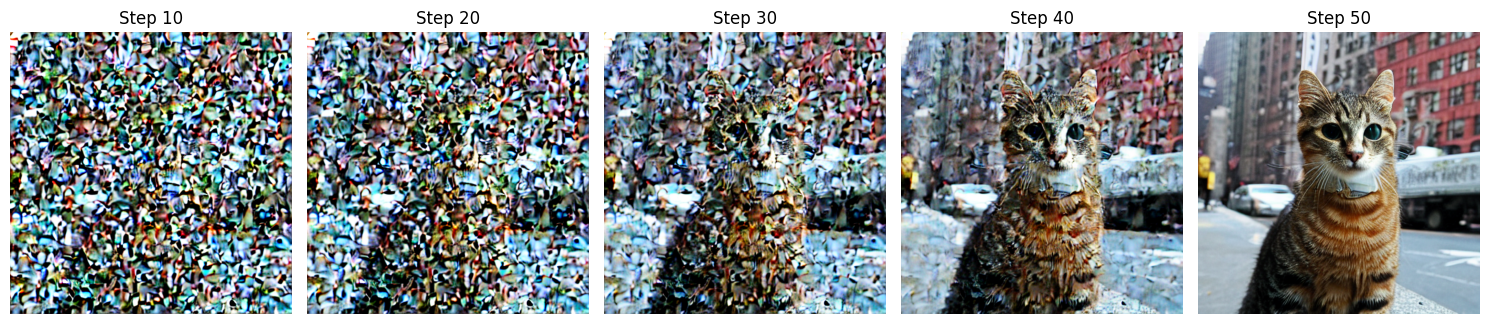

In [6]:
steps = [10, 20, 30, 40, 50]
images = {}

def generate_image(latent_representations):
    latent_representations = 1 / 0.18215 * latent_representations
    image = pipeline.vae.decode(latent_representations).sample
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
    return image

def save_images(step, timestep, latent_representations):
    if step in steps:
        images[step] = generate_image(latent_representations)

generator = torch.manual_seed(42)
prompt = "cat in new york"
pipeline(prompt, generator=generator, callback=save_images, callback_steps=1)

plt.figure(figsize=(15, 5))
for i, step in enumerate(steps):
    plt.subplot(1, len(steps), i + 1)
    plt.imshow(images[step])
    plt.title(f"Step {step}")
    plt.axis("off")
plt.tight_layout()
plt.show()